
# Project: Investigate a Dataset TMDb Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

-This dataset contains 10866 rows and 21 columns of information about movies released between 1960 and 2015.
<br>
-The dataset was analysed and the conclusions are highlighted in the end.

## Research Questions

- Wht were the trends in the movie ratings over the years?
<br>
-Identify the trends in the budgets and revenues over the years
<br>
-Which movie genreated the highest revenue
<br>
-How are the profits generated related to the revenues?
<br>
-Were the average profits increasing over time?
<br>
-How are the average runtimes changing over the the studied period?
<br>
-What is the trend in the number of movies released yearly?


### Set up the environment

In [1]:
#import the necessary packages for this analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load your data into the Jupyter notebook environment
# print the first 2 rows
df = pd.read_csv("D:/Learning/Data Science/Datasets/tmdb-movies.csv")
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


<a id='wrangling'></a>
## Data Wrangling

-In this section of the report, I will load the data into the Python system, check for cleanliness, and clean data for analysis. 

### General Properties

In [3]:
# get the number of rows and columns in the dataset
df.shape

(10866, 21)

It has go 4803 rows and 20 columns in the data
<br>
Careful on the data types especially the integers and floats, they seem to be in the correct format which can aid the analysis

In [4]:
# get the statistical descriptions summary of the integer & float columns
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
# get the general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
# list the dataset column names
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [7]:
# drop columns that are not likely to be useful in the analysis
df.drop(['id', 'imdb_id', 'overview', 'homepage', 'keywords', 'overview', 'tagline', 'original_title',  ], axis=1, inplace = True)
df.head(2)

,popularity,budget,revenue,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08





### Data Cleaning 

In [8]:
# check for the duplicated rows
df.duplicated().sum()

1

In [9]:
# drop the duplicated rows from the dataset
df.drop_duplicates(inplace=True)

In [10]:
# check for null values in the columns
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [11]:
# drop the null values from the select rows
df.dropna(subset=['cast', 'director', 'production_companies', 'genres'], inplace=True)

In [12]:
df.isnull().sum()

popularity              0
budget                  0
revenue                 0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

### Summary of the data cleaning section
-All the null values in the dataset have been removed.
<br>
-Some null values in the movie duration row were filled with average movie duration
<br>
-Droped rows that were deemed not useful for this analysis

<a id='eda'></a>
## Exploratory Data Analysis

-Computations of the statistics and creation of the visualizations with the goal of answering questions using the relationships between the variables of the dataset.

## Research Question 1: Show the data distributions of the various variables

In [13]:
# define a function to plot a histogram
def histogram(data, x_label = "", y_label = "", title = ""):
    _, ax = plt.subplots()
    ax.hist(data, color = '#539caf')
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)

In [14]:
ratings = df['vote_average']
ratings.head(2)

0    6.5
1    7.1
Name: vote_average, dtype: float64

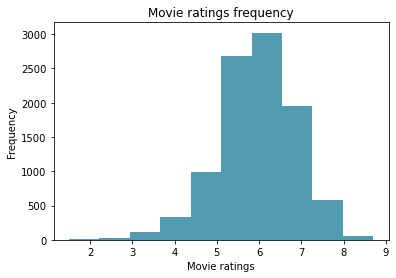

In [15]:
# use the histogram function to plot the movie ratings histogram
histogram(ratings,'Movie ratings', 'Frequency', 'Movie ratings frequency')

In [16]:
df.columns

Index(['popularity', 'budget', 'revenue', 'cast', 'director', 'runtime',
       'genres', 'production_companies', 'release_date', 'vote_count',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

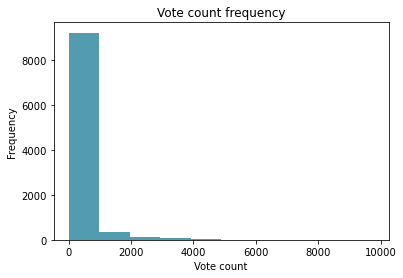

In [17]:
# have the histogram for the votecount
histogram(df['vote_count'],'Vote count', 'Frequency', 'Vote count frequency')

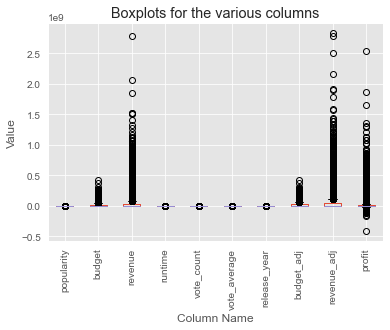

In [86]:
df.boxplot()
plt.xticks(rotation=90)
plt.xlabel('Column Name')
plt.ylabel('Value')
plt.title('Boxplots for the various columns')
plt.show()

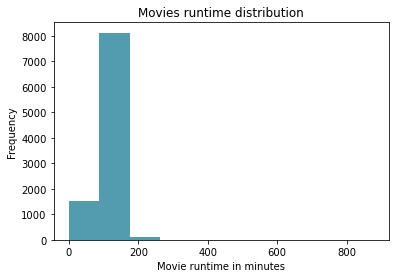

In [18]:

# have the histogram for the votecount
histogram(df['runtime'],'Movie runtime in minutes', 'Frequency', 'Movies runtime distribution')

In [60]:
# average movie runtime
df['runtime'].mean()

102.92662709783053

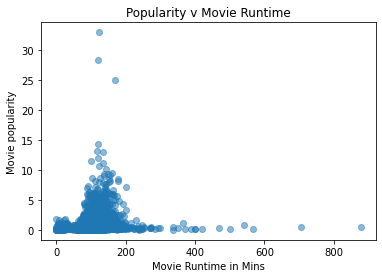

In [19]:
# relationship between runtime and popularity - using a scatter plot
plt.scatter(x = 'runtime', y = 'popularity', data = df, alpha = 0.5)
plt.xlabel('Movie Runtime in Mins')
plt.ylabel('Movie popularity')
plt.title('Popularity v Movie Runtime')
plt.show()

### Research Question 2: Revenues and budget by year

In [21]:
# define a function to help plot the line graphs
def linegraph(Dataframe, x_values, x_label, y_values, y_label, title):
    Dataframe.plot(x=x_values, y=y_values)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title, fontsize=16)
    plt.show()

In [22]:
# group the budget and revenue by year
yearly_numbers = df.groupby('release_year')['budget', 'revenue'].sum()
yearly_numbers.head(2)

C:\Users\HP\AppData\Local\Temp\ipykernel_12880\3357644263.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  yearly_numbers = df.groupby('release_year')['budget', 'revenue'].sum()


,budget,revenue
release_year,,
1960,22056948,145005000
1961,46137000,337720188


C:\Users\HP\AppData\Local\Temp\ipykernel_12880\712549994.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  yearly_numbers = df.groupby('release_year')['budget', 'revenue'].sum()


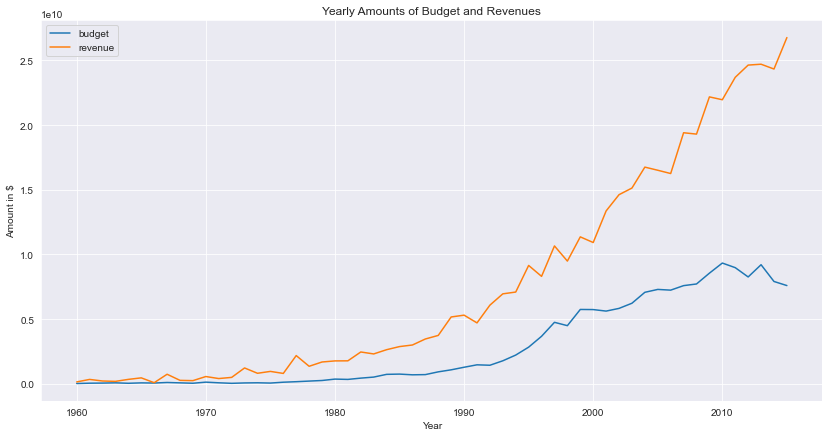

In [23]:
# plot a line graph
#use seaborn to set the backgrid to dark with grid
sns.set_style("darkgrid")
yearly_numbers = df.groupby('release_year')['budget', 'revenue'].sum()
yearly_numbers.plot(kind='line', figsize=(14,7))
plt.xlabel('Year')
plt.ylabel('Amount in $')
plt.title('Yearly Amounts of Budget and Revenues')
plt.show()

## Q2: Yearly movie ratings


In [24]:
df.head(2)

,popularity,budget,revenue,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [27]:
# get the yearly ratings
yearly_ratings = df.groupby('release_year', as_index=False)['vote_average'].mean()
yearly_ratings.head(2)

,release_year,vote_average
0,1960,6.325000
1,1961,6.433333


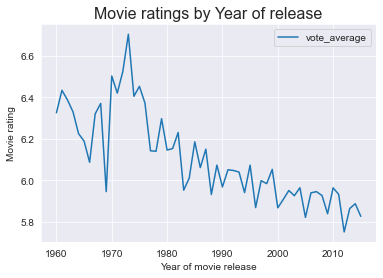

In [29]:
# use the linegraph function to plot the movie ratings graph
linegraph(yearly_ratings, 'release_year', 'Year of movie release', 'vote_average', 'Movie rating', 'Movie ratings by Year of release')

In [30]:
# group the movies by release year to show the vote average
yearly_ratings[yearly_ratings['release_year']>=2010]

,release_year,vote_average
50,2010,5.963095
51,2011,5.932018
52,2012,5.750602
53,2013,5.863316
54,2014,5.886614
55,2015,5.825627


C:\Users\HP\AppData\Local\Temp\ipykernel_12880\641536630.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  yearly_averages = df.groupby('release_year')['budget', 'revenue'].mean()


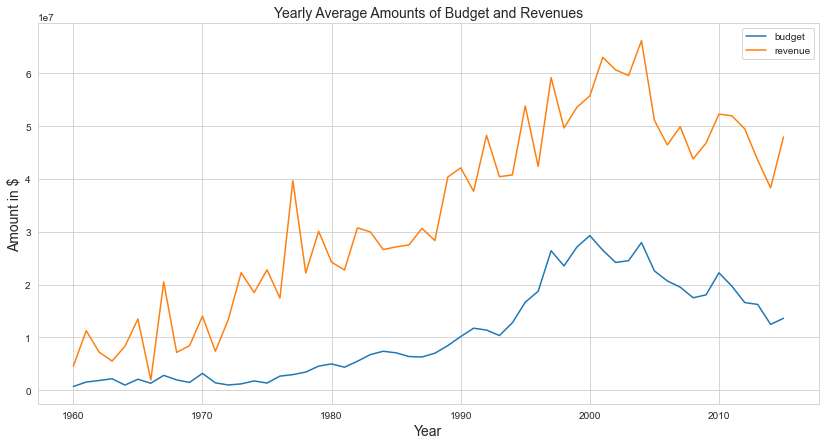

In [31]:
#plot the data
sns.set_style("whitegrid")
yearly_averages = df.groupby('release_year')['budget', 'revenue'].mean()
yearly_averages.plot(kind='line', figsize=(14,7))
plt.xlabel('Year', fontsize=(14))
plt.ylabel('Amount in $', fontsize=(14))
plt.title('Yearly Average Amounts of Budget and Revenues', fontsize=(14))
plt.show()

* Revenues keep fluctuating but on an increase
<br>
* The budgets are slowly but steadily increasing with time

## Q3: Trends in runtimes

In [32]:
# group the dataset by release year to show the average runtimes
runtime_df = df.groupby('release_year', as_index=False)['runtime'].mean()
runtime_df.head(2)

,release_year,runtime
0,1960,110.656250
1,1961,119.866667


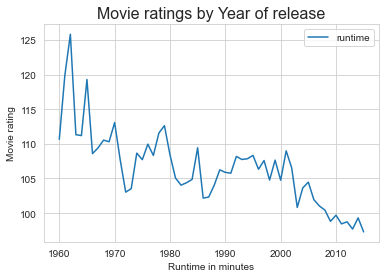

In [33]:
# use the linegraph function to show average movie ratings trend over the years
linegraph(runtime_df, 'release_year', 'Runtime in minutes', 'runtime', 'Movie rating', 'Movie ratings by Year of release')

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9772.000000,9.772000e+03,9.772000e+03,9772.000000,9772.000000,9772.000000,9772.000000,9.772000e+03,9.772000e+03
mean,0.694721,1.617967e+07,4.423121e+07,102.926627,239.312014,5.963528,2000.878428,1.941599e+07,5.705309e+07
std,1.036931,3.221074e+07,1.225889e+08,27.877432,603.011504,0.913174,13.036794,3.566634e+07,1.514499e+08
min,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.232710,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,0.419762,2.000000e+05,0.000000e+00,100.000000,46.000000,6.000000,2005.000000,3.061342e+05,0.000000e+00
75%,0.776408,1.928750e+07,3.104729e+07,112.000000,173.000000,6.600000,2011.000000,2.464268e+07,4.311848e+07
max,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


In [38]:
# fill any null values w=in the budget and revenue section with averages
df['budget'].fillna(value=df['budget'].mean(), inplace = True)
df['revenue'].fillna(value=df['revenue'].mean(), inplace = True)


## Q4: Movie that generated most revenues

In [44]:
# get the details of the movie that generated maximum revenue
df[df['revenue']==df['revenue'].max()]

,popularity,budget,revenue,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,9.432768,237000000,2781505847,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09


## Q5: Average profit trends over the years

In [48]:
#Create a row to show profit(loss) generated from a movie
df['profit'] = df['revenue']-df['budget']

In [55]:
# Group the dataset by year to show profit
av_profits = df.groupby('release_year', as_index=False)['profit'].mean()
profits.head(2)

,release_year,profit
0,1960,3842126.625
1,1961,9719439.600


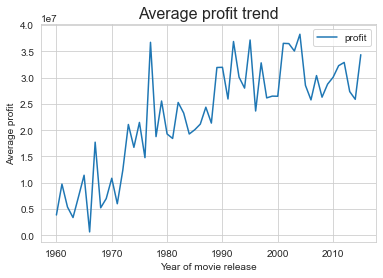

In [56]:
#plot a line graph showing profits with time
linegraph(av_profits, 'release_year', 'Year of movie release', 'profit', 'Average profit', 'Average profit trend')

## Q6: Relationship between revenue and profit

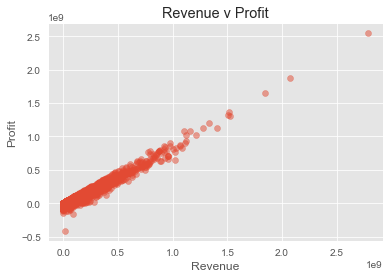

In [57]:
# Plot a scatter plot to show the relationship revenue and profit
plt.style.use('ggplot')
plt.scatter(x = 'revenue', y = 'profit', data = df, alpha = 0.5)
plt.xlabel('Revenue')
plt.ylabel('Profit')
plt.title('Revenue v Profit')
plt.show()

- There is a strong correction. 
<br>
- Revenue is directly proportional to profits realized

## Q7: Relationship between profit and  ratings

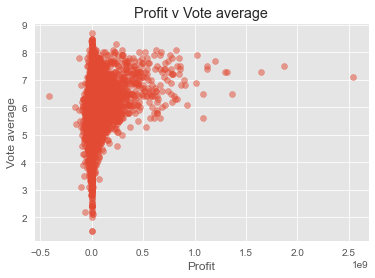

In [59]:
# Plot a scatter plot to show the relationship profit and profit
plt.style.use('ggplot')
plt.scatter(x = 'profit', y = 'vote_average', data = df, alpha = 0.5)
plt.xlabel('Profit')
plt.ylabel('Vote average')
plt.title('Profit v Vote average')
plt.show()

-There is no clear correlation between profits and vote average

## Q7: Movie count by release year

In [75]:
# Group the movies based of year of release
movies_by_year = df.groupby('release_year', as_index=False)['popularity'].count()
movies_by_year.tail()

,release_year,popularity
51,2011,456
52,2012,498
53,2013,567
54,2014,635
55,2015,558


In [82]:
res = df['release_year'].value_counts()\
                 .to_frame('count').rename_axis('release_year')\
                 .reset_index()
ordered_res = res.sort_values(by='release_year')
res.head(3)

,release_year,count
0,2014,635
1,2013,567
2,2015,558


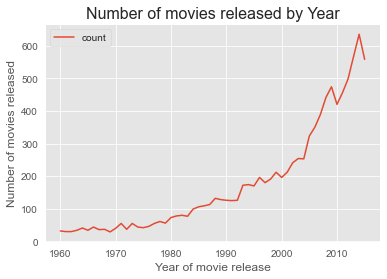

In [83]:
#plot a line graph showing number of movies released with time
linegraph(ordered_res, 'release_year', 'Year of movie release', 'count', 'Number of movies released', 'Number of movies released by Year')

<a id='conclusions'></a>
## Conclusions

- Most movies had a runtime between 80 and 150 minutes with the average being 101 minutes
<br>
- The sum of movie budgets and revenues was steadily increasing with time
<br>
- The average movie ratings are steadily falling
<br>
- The average movie budgets and revenues were on the rise from 1960 peaking around 2000s, then steadily falling in the 2010s
<br>
- The average movie duration is constantly declining with time
<br>
- The average profit from the movies is constantly increasing over the years
<br>
- There is a positive correlation between profit and revenue
<br>
- The number of movies being release is increasing steadily by year

## Limitations

- The dataset used for this analysis was not clean. There were some duplicated rows, null values, rows with no genres. da

- These rows were dropped, some values in the revenues being filled with averages which may not be ideal in the overall accurate representation for the data.